In [1]:
import numpy as np
from astropy.io import fits
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum
from spectractor import parameters
from spectractor.extractor.images import *

## Spectrum settings and paths 

In [3]:
spec_date = 20230117
spec_source = 'MU-COL'
spec_phys_filter = 'empty-holo4_003'

In [35]:
spec_path_base = './pseudo_postisrccd_img/'

if spec_date=='all':
    date_label = 'all_dates_'
else:
    date_label = str(spec_date)+'_'
if spec_source=='all':
    source_label = 'all_sources_'
else:
    source_label = spec_source+'_'
if spec_phys_filter=='all':
    phys_filter_label = 'all_phys_filters'
else:
    phys_filter_label = spec_phys_filter

spec_path_label = date_label+source_label+phys_filter_label
print('Looking for ', spec_path_label)
print('--------------')
spec_path_ = [d for d in os.listdir(spec_path_base) if spec_path_label in d]
assert len(spec_path_)==1
spec_path_ = spec_path_[0]
spec_path = os.path.join(spec_path_base,spec_path_)
spec_list = os.listdir(spec_path)
for s_ in spec_list:
    print(s_)

spec_list0 = [s for s in spec_list if 'flat' not in s]


Looking for  20230117_MU-COL_empty-holo4_003
--------------
exposure_2023011700266_empty-holo4_003_pseudo-postisrccd_flat.fits
exposure_2023011700266_empty-holo4_003_pseudo-postisrccd_special_flat.fits
exposure_2023011700265_empty-holo4_003_pseudo-postisrccd_flat.fits
exposure_2023011700265_empty-holo4_003_pseudo-postisrccd_special_flat.fits
exposure_2023011700266_empty-holo4_003_pseudo-postisrccd.fits
exposure_2023011700265_empty-holo4_003_pseudo-postisrccd.fits


In [36]:
seq_nums = []
for s_ in spec_list0:
    seq_nums.append(s_.replace('exposure_{0}00'.format(spec_date),'')[:3])
print('Available sequence numbers: ', seq_nums)

Available sequence numbers:  ['266', '265']


In [7]:
spec_seq = 265

## Spectractor settings 

In [8]:
#filename="../tests/data/reduc_20170530_134.fits"
#config = "./spectractor_configs/auxtel.ini"
config = "./spectractor_configs/auxtel_rebin1.ini"
outdir = "./spectractor_outputs/"
if os.path.exists(outdir)==False:
    os.mkdir(outdir)
disperser_label = spec_phys_filter
if spec_source=='MU-COL':
    target_label = "HD38666"
else:
    target_label = spec_source

In [9]:
spec_name_0 = 'exposure_{0}00{1}_{2}_pseudo-postisrccd.fits'.format(spec_date,spec_seq,spec_phys_filter)
spec_name_f = 'exposure_{0}00{1}_{2}_pseudo-postisrccd_flat.fits'.format(spec_date,spec_seq,spec_phys_filter)
spec_name_sf = 'exposure_{0}00{1}_{2}_pseudo-postisrccd_special_flat.fits'.format(spec_date,spec_seq,spec_phys_filter)
print(spec_name_0)
print(spec_name_f)
print(spec_name_sf)

exposure_2023011700265_empty-holo4_003_pseudo-postisrccd.fits
exposure_2023011700265_empty-holo4_003_pseudo-postisrccd_flat.fits
exposure_2023011700265_empty-holo4_003_pseudo-postisrccd_special_flat.fits


In [10]:
filename_0 = os.path.join(spec_path,spec_name_0)
filename_f = os.path.join(spec_path,spec_name_f)
filename_sf = os.path.join(spec_path,spec_name_sf)

In [11]:
ref_file_0 = fits.open(filename_0)
ref_data_0 = ref_file_0[1].data

ref_file_f = fits.open(filename_f)
ref_data_f = ref_file_f[1].data

ref_file_sf = fits.open(filename_sf)
ref_data_sf = ref_file_sf[1].data

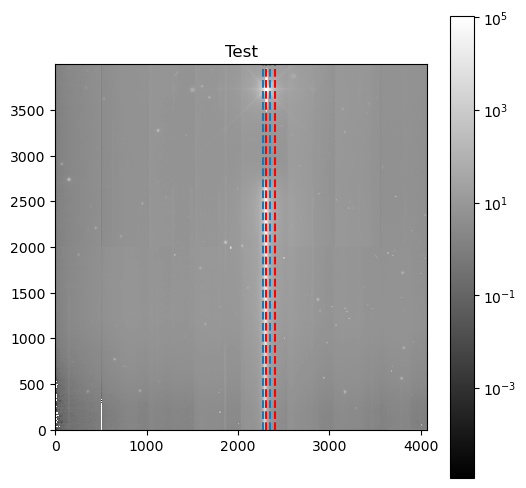

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
im = ax.imshow(ref_data_0,cmap="gray",origin='lower',norm=LogNorm())
ax.axvline(x=2275,ls='--')
ax.axvline(x=2355,ls='--')
ax.axvline(x=2305,ls='--',color='r')
ax.axvline(x=2400,ls='--',color='r')
ax.set_title('Test')
plt.colorbar(im,ax=ax)

In [13]:
#ref_spec = np.sum(ref_data[:,2275:2355],axis=1)
ref_spec_0 = ref_data_0[:,2305]
ref_spec_f = ref_data_f[:,2305]
ref_spec_sf = ref_data_sf[:,2305]
print(len(ref_spec_0),len(ref_spec_f),len(ref_spec_sf))
print(ref_data_0.shape)

4000 4000 4000
(4000, 4072)


Text(0.5, 0, 'Pixel')

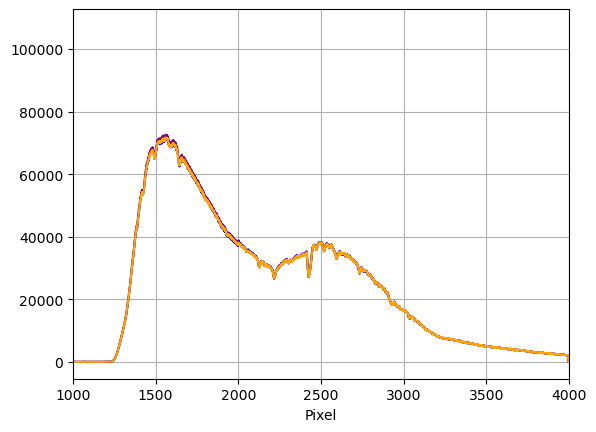

In [14]:
pix_ = np.arange(len(ref_spec_0))
plt.plot(pix_,ref_spec_0[::-1],color='b')
plt.plot(pix_,ref_spec_f[::-1],color='purple')
plt.plot(pix_,ref_spec_sf[::-1],color='orange')
plt.xlim(1000,4000)
#plt.ylim(0,5e4)
plt.grid()
plt.xlabel('Pixel')

Text(0.5, 0, 'Pixel')

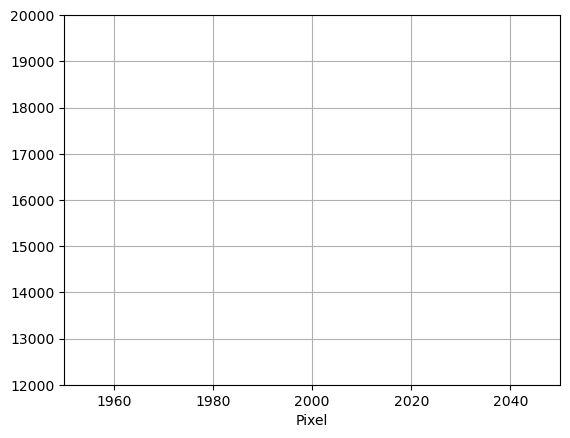

In [15]:
pix_ = np.arange(len(ref_spec_0))
plt.plot(pix_,ref_spec_0[::-1],color='b')
plt.plot(pix_,ref_spec_f[::-1],color='purple')
plt.plot(pix_,ref_spec_sf[::-1],color='orange')
plt.xlim(1950,2050)
plt.ylim(12000,20000)
#plt.ylim(0,200)
plt.grid()
plt.xlabel('Pixel')

In [16]:
flat_date = 20230116
flat_filter = 'empty_1'

flat_path_base = './special_flats/'
flat_path_ = os.path.join(flat_path_base,str(flat_date))

fpath_list = [f for f in os.listdir(flat_path_) if str(flat_date) in f]
for f_ in fpath_list:
    print(f_)

2023011600015


In [17]:
flat_id = 2023011600015

flat_path = os.path.join(flat_path_,str(flat_id))

flat_list0 = [f for f in os.listdir(flat_path) if '.fits' in f and flat_filter in f]

flat_list = []
sflat_list = []
print('Available flats: ')
for f_ in flat_list0:
    flat_list = [f for f in flat_list0 if 'special' not in f]
    sflat_list = [f for f in flat_list0 if 'special' in f]
    print('        ',f_)
assert len(flat_list)==1
assert len(sflat_list)==1
flat_file = flat_list[0]
sflat_file = sflat_list[0]

Available flats: 
         special_flat_2023011600015_empty_1_ws_40.fits
         flat_2023011600015_empty_1.fits


In [18]:
sflat = fits.open(os.path.join(flat_path,sflat_file))
flat = fits.open(os.path.join(flat_path,flat_file))
sflat_data = sflat[1].data
flat_data = flat[1].data

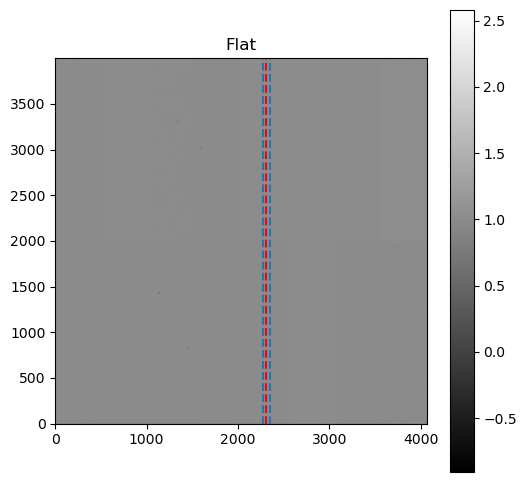

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
im = ax.imshow(sflat_data,cmap="gray",origin='lower')#,norm=LogNorm())
ax.axvline(x=2275,ls='--')
ax.axvline(x=2355,ls='--')
ax.axvline(x=2305,ls='--',color='r')
ax.set_title('Flat')
plt.colorbar(im,ax=ax)

In [20]:
ref_sflat = sflat_data[:,2305]
ref_flat = flat_data[:,2305]

Text(0.5, 0, 'Pixel')

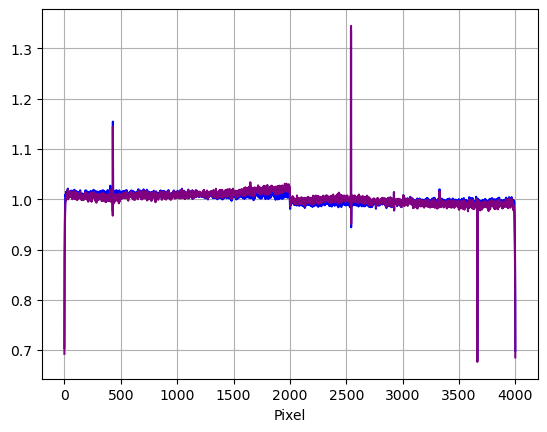

In [21]:
pix_ = np.arange(len(ref_spec_0))
plt.plot(pix_,ref_sflat[::-1],color='b')
plt.plot(pix_,ref_flat[::-1],color='purple')
#plt.xlim(1950,2050)
#plt.ylim(12000,20000)
plt.grid()
plt.xlabel('Pixel')

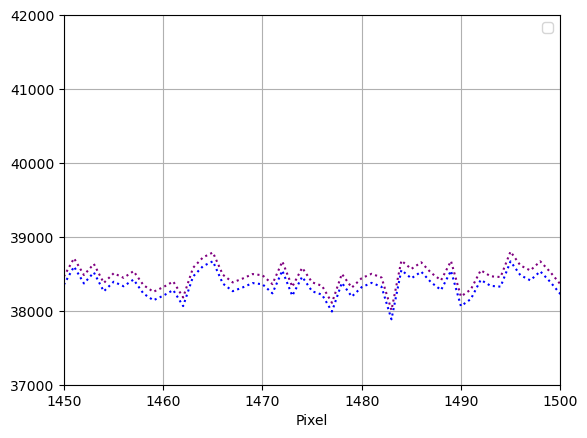

In [22]:
pix_ = np.arange(len(ref_spec_0))
plt.plot(pix_,ref_spec_0[::-1],color='b')
plt.plot(pix_,ref_spec_f[::-1],color='purple')
plt.plot(pix_,ref_spec_sf[::-1],color='orange')
plt.plot(pix_,ref_sflat[::-1]*38000.,ls=':',color='b')
plt.plot(pix_,ref_flat[::-1]*38000.,ls=':',color='purple')
plt.xlim(1450,1500)
#plt.ylim(12500,18000)
plt.ylim(37000,42000)
plt.grid()
plt.xlabel('Pixel')
plt.legend()

In [23]:
image_0 = Image(filename_0,target_label=target_label,disperser_label=disperser_label,config=config)

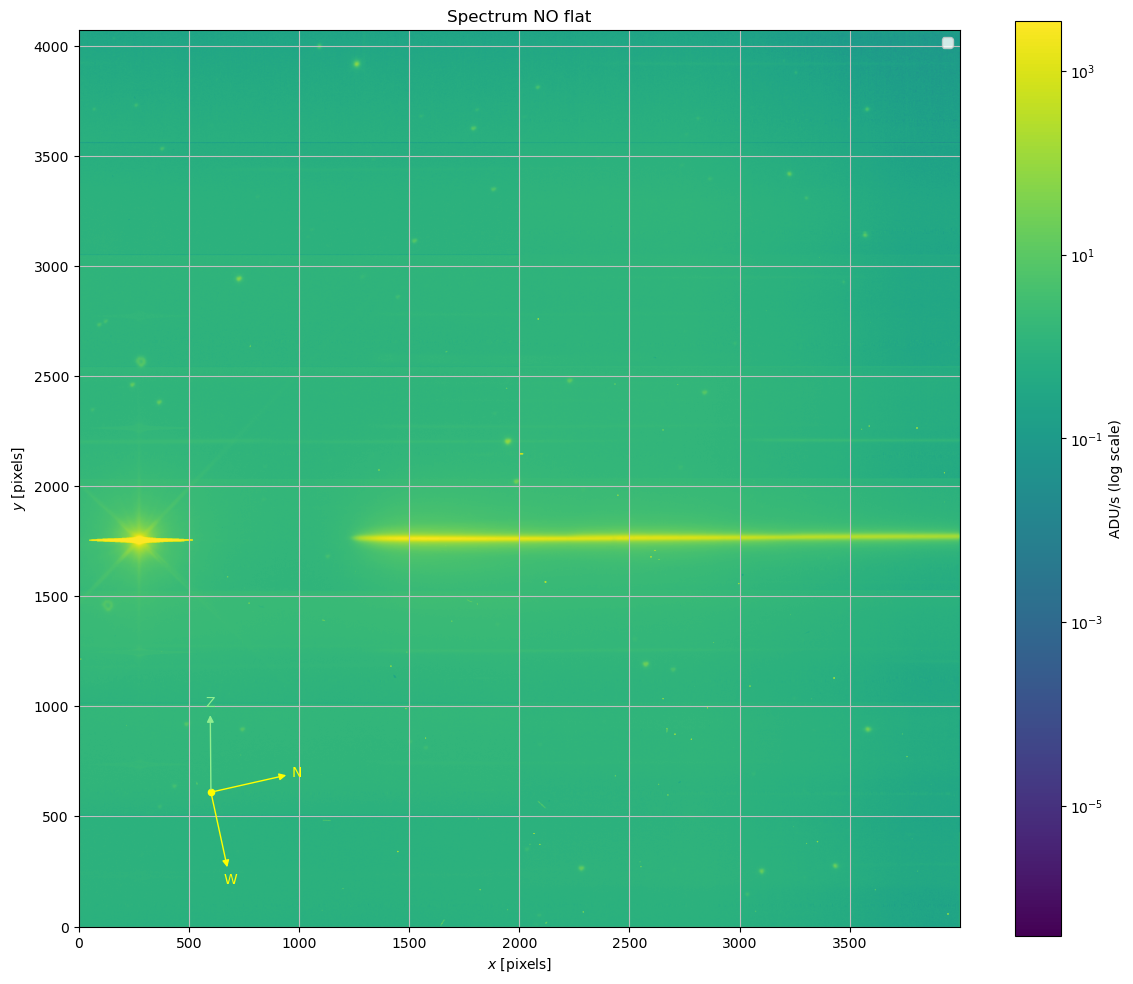

In [24]:
%matplotlib inline
title="Spectrum NO flat"
image_0.plot_image(figsize=(12, 10),scale="log",title=title)
plt.show()

In [25]:
image_f = Image(filename_f,target_label=target_label,disperser_label=disperser_label,config=config)

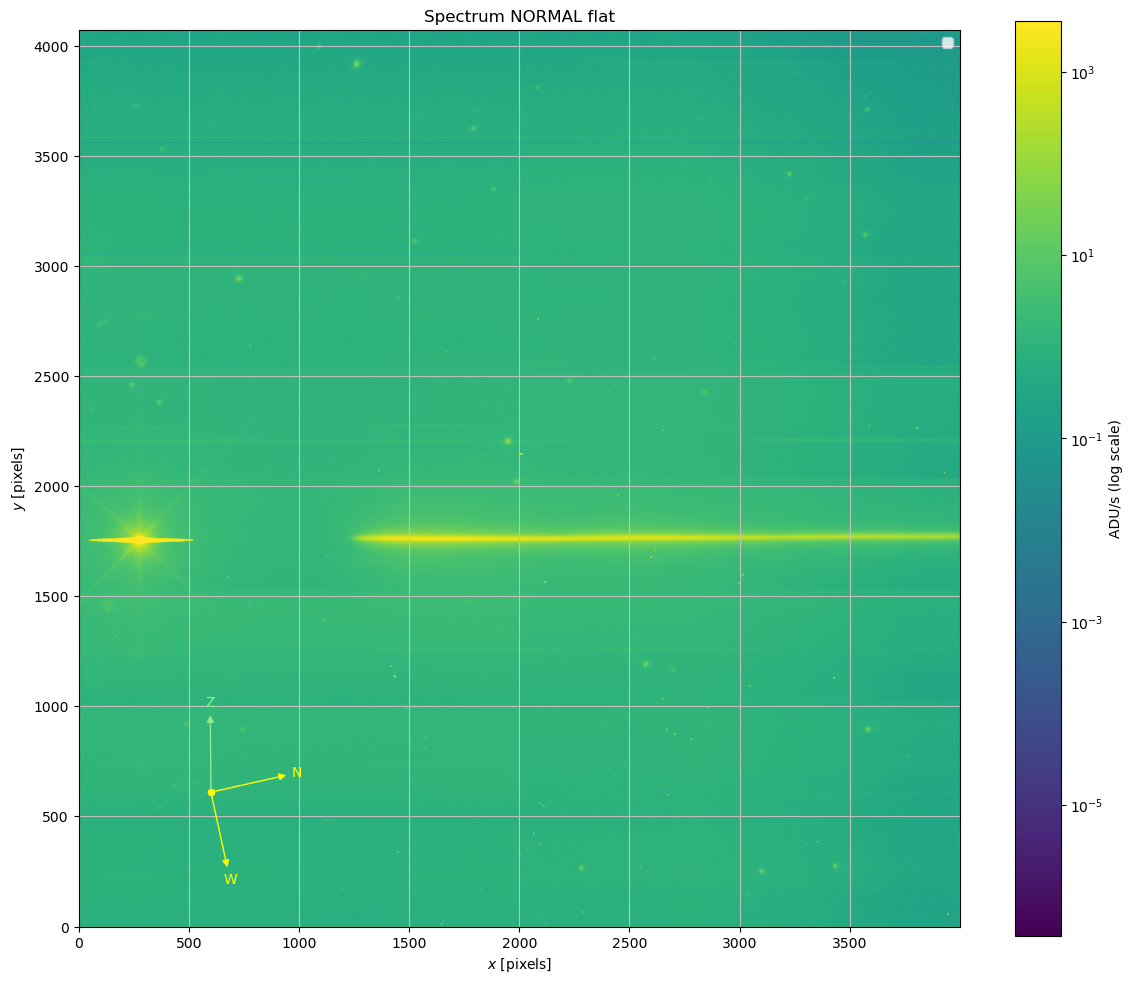

In [26]:
%matplotlib inline
title="Spectrum NORMAL flat"
image_f.plot_image(figsize=(12, 10),scale="log",title=title)
plt.show()

In [27]:
image_sf = Image(filename_sf,target_label=target_label,disperser_label=disperser_label,config=config)

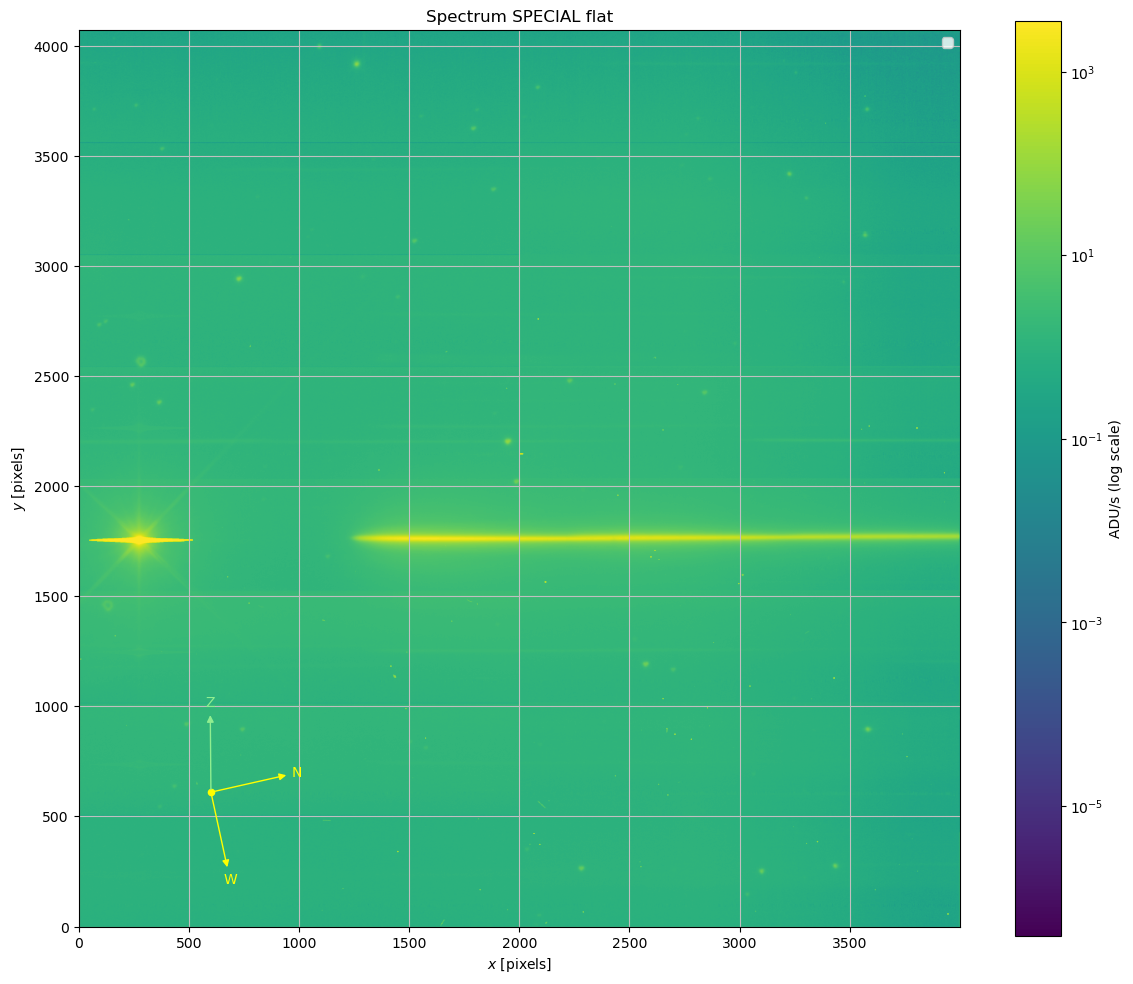

In [28]:
%matplotlib inline
title="Spectrum SPECIAL flat"
image_sf.plot_image(figsize=(12, 10),scale="log",title=title)
plt.show()

## Set approximate coordinates for the zero order 

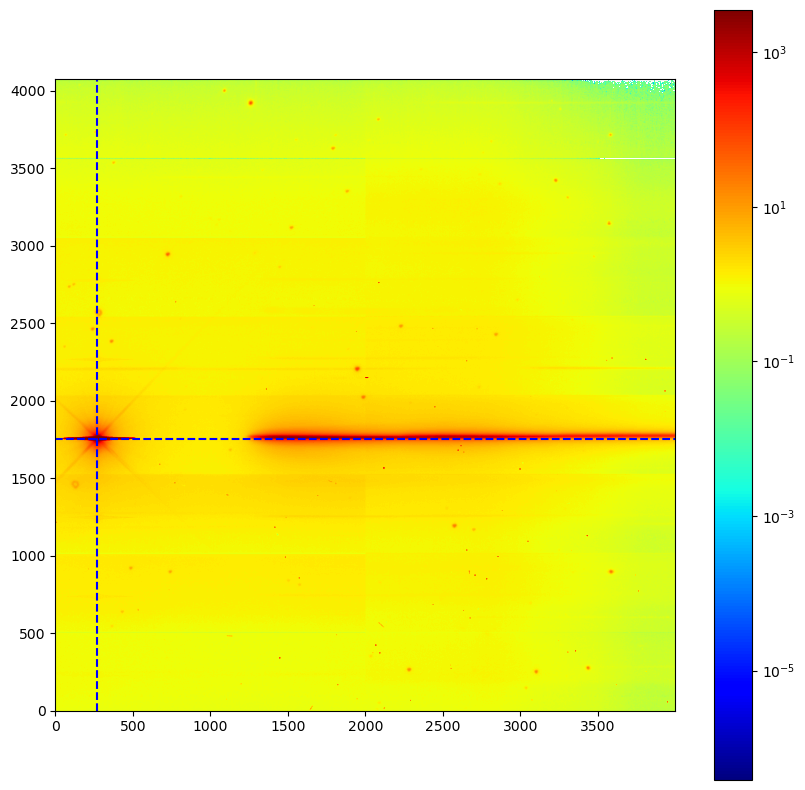

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(image_0.data,cmap="jet",origin='lower',norm=LogNorm())
ax.axvline(x=272,ls='--',color='b')
ax.axhline(y=1750,ls='--',color='b')
plt.colorbar(im,ax=ax)

In [30]:
guess0 = [272,1750]

In [31]:
%matplotlib inline
x1, y1 = find_target(image_0, guess0,rotated=False)

In [32]:
print(x1,y1)
guess = [x1,y1]

273.40103230909705 1755.412088637


In [33]:
spectrum_0 = Spectractor(filename_0, outdir, guess=guess, target_label=target_label, disperser_label=disperser_label, config=config)

2023-09-08 12:52:15  Image      find_target_Moffat2D WARNING 
	X=60.44, Y=46.05 target position determination probably wrong: 11.0 pixels from profile detection (50.44, 50.60)
/home/m/monroy/repos/repos_w_2023_35/Spectractor/lib/python/spectractor/fit/fitter.py:1772: OptimizeWarning: Unknown solver options: ftol
  result = optimize.minimize(nll, fit_workspace.params.values, method=minimizer_method,


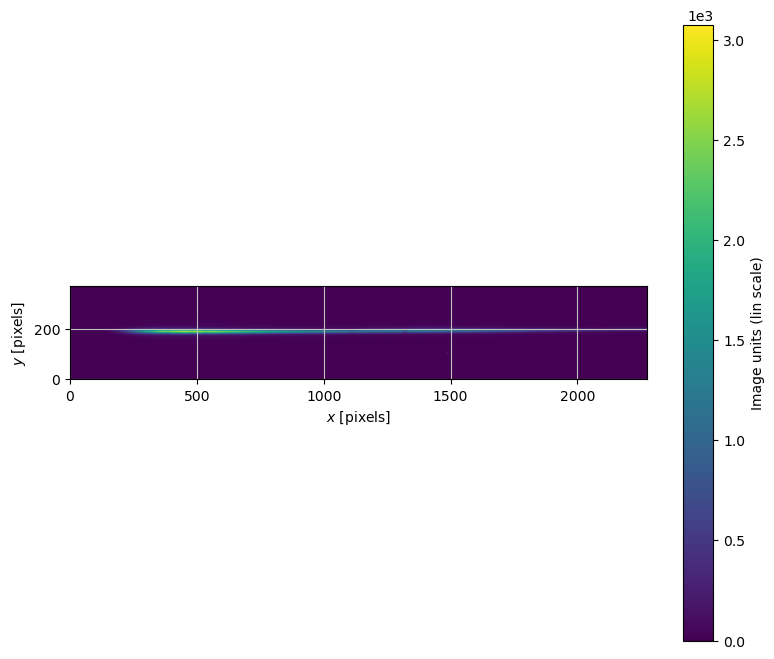

In [37]:
%matplotlib inline
spectrum_0.plot_spectrogram()
plt.show()

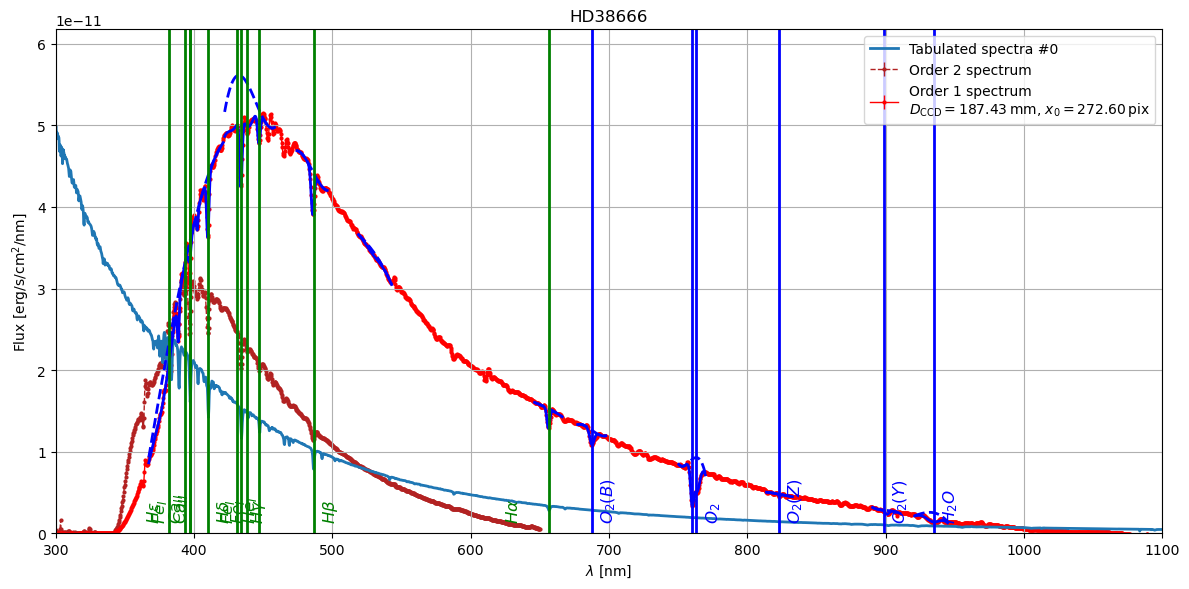

In [38]:
%matplotlib inline
spectrum_0.plot_spectrum()
plt.show()

In [39]:
spectrum_f = Spectractor(filename_f, outdir, guess=guess, target_label=target_label, disperser_label=disperser_label, config=config)

2023-09-08 13:50:19  Image      find_target_Moffat2D WARNING 
	X=60.45, Y=45.98 target position determination probably wrong: 11.0 pixels from profile detection (50.45, 50.60)


KeyboardInterrupt: 

In [ ]:
%matplotlib inline
spectrum_f.plot_spectrogram()
plt.show()

In [ ]:
%matplotlib inline
spectrum_f.plot_spectrum()
plt.show()

In [ ]:
spectrum_sf = Spectractor(filename_sf, outdir, guess=guess, target_label=target_label, disperser_label=disperser_label, config=config)

In [ ]:
%matplotlib inline
spectrum_sf.plot_spectrogram()
plt.show()

In [ ]:
%matplotlib inline
spectrum_sf.plot_spectrum()
plt.show()

In [ ]:
(spectrum_0.lambda_ref==spectrum_f.lambda_ref)

In [ ]:
spectrum_0.lambda_ref

In [ ]:
l0 = spectrum_0.lambdas
lf = spectrum_f.lambdas
lsf = spectrum_sf.lambdas

spec0 = spectrum_0.data
specf = spectrum_f.data
specsf = spectrum_sf.data

spec02 = spectrum_0.data_next_order
specf2 = spectrum_f.data_next_order
specsf2 = spectrum_sf.data_next_order


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(l0,spec0,ls='-',color='b',label='NO flat',alpha=0.5)
plt.plot(lf,specf,ls=':',color='purple',label='Normal flat')
plt.plot(lsf,specsf,ls=':',color='orange',label='Special flat')
plt.grid()
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'Flux [$erg/s/cm^2/nm$]')
plt.legend(loc="best")

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(l0,spec0,ls='-',color='b',label='NO flat',alpha=0.5)
plt.plot(lf,specf,ls=':',color='purple',label='Normal flat')
plt.plot(lsf,specsf,ls=':',color='orange',label='Special flat')
plt.xlim(600,640)
plt.ylim(1.5e-11,2.2e-11)
plt.grid()
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'Flux [$erg/s/cm^2/nm$]')
plt.legend(loc="best")

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(l0,spec0,ls='-',color='b',label='NO flat',alpha=0.5)
plt.plot(lf,specf,ls=':',color='purple',label='Normal flat')
plt.plot(lsf,specsf,ls=':',color='orange',label='Special flat')
plt.xlim(350,450)
#plt.ylim(-1e-11,1.3e-11)
plt.grid()
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'Flux [$erg/s/cm^2/nm$]')
plt.legend(loc="best")

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(l0,spec02,ls='-',color='b',label='NO flat',alpha=0.5)
plt.plot(lf,specf2,ls=':',color='purple',label='Normal flat')
plt.plot(lsf,specsf2,ls=':',color='orange',label='Special flat')
plt.xlim(300,500)
plt.grid()
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'Flux [$erg/s/cm^2/nm$]')
plt.legend(loc="best")